In [11]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_drug, clinical_trial, how='outer', on="Mouse ID")


# Display the data table for preview
combined_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [97]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_mean = combined_data.groupby(["Drug", "Timepoint"]).mean()
grouped_mean.reset_index(level = None, inplace = True)

# Convert to DataFrame
mean_tumor = pd.DataFrame(data=grouped_mean)
# Preview DataFrame
mean_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [98]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
grouped_sem = combined_data.groupby(["Drug", "Timepoint"]).sem()
grouped_sem.reset_index(level = None, inplace = True)
# Convert to DataFrame
sem_tumor = pd.DataFrame(data=grouped_sem)
# Preview DataFrame
sem_tumor.head()

,Drug,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731


In [99]:
# # Minor Data Munging to Re-Format the Data Frames
reformat_mean =mean_tumor.pivot_table(values = 'Tumor Volume (mm3)', index = 'Timepoint', columns='Drug') 
reformat_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [100]:
reformat_sem =sem_tumor.pivot_table(values = 'Tumor Volume (mm3)', index = 'Timepoint', columns='Drug') 
reformat_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [101]:
reformat_sem_compare = reformat_sem[["Capomulin","Infubinol","Ketapril","Placebo"]]
reformat_mean_compare = reformat_mean[["Capomulin","Infubinol","Ketapril","Placebo"]]
reformat_sem_compare

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


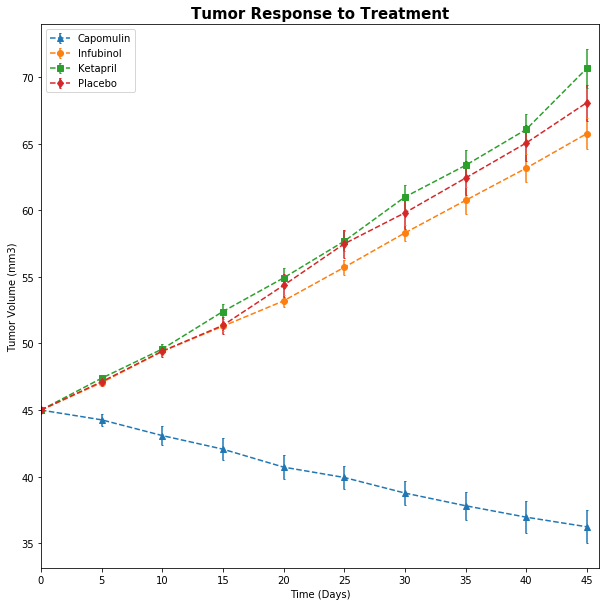

In [102]:
#plot options
plt.figure(figsize = (10,10))
plt.title('Tumor Response to Treatment', fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Time (Days)', fontdict = {'fontsize': 10})
plt.ylabel('Tumor Volume (mm3)', fontdict = {'fontsize': 10})
plt.xticks(np.arange(0, reformat_mean_compare.index.max()+3 , 5)) # location of separators for timepoint
plt.xlim(0, reformat_mean_compare.index.max() + 1) 

#format settings 
fmts = ['--^','--o','--s','--d']
# independent variable
x = reformat_mean_compare.index #timepoints

#count for markers in plot loop
count = 0

#plot each tumor volume column with standard error
for drug in reformat_mean_compare.columns:
    plt.errorbar(x, 
                 reformat_mean_compare[drug], 
                 reformat_sem_compare[drug], #std error
                 fmt =  fmts[count], 
                 capsize = 1)  # for caps on error bars
    count += 1

#legend 
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc=2)
plt.show()

## Metastatic Response to Treatment

In [103]:
# Minor Data Munging to Re-Format the Data Frames
reformat_mean_metastic =mean_tumor.pivot_table(values = 'Metastatic Sites', index = 'Timepoint', columns='Drug') 
reformat_sem_metastic =sem_tumor.pivot_table(values = 'Metastatic Sites', index = 'Timepoint', columns='Drug') 
metastic_sem_compare = reformat_sem_metastic[["Capomulin","Infubinol","Ketapril","Placebo"]]
metastic_mean_compare = reformat_mean_metastic[["Capomulin","Infubinol","Ketapril","Placebo"]]

# Preview that Reformatting worked
metastic_mean_compare.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


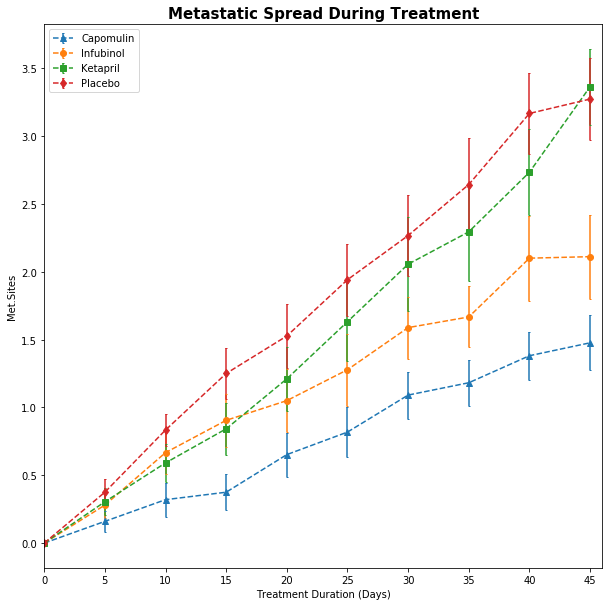

In [128]:
#plot options
plt.figure(figsize = (10,10))
plt.title('Metastatic Spread During Treatment', fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Treatment Duration (Days)', fontdict = {'fontsize': 10})
plt.ylabel('Met.Sites', fontdict = {'fontsize': 10})
plt.xticks(np.arange(0, metastic_mean_compare.index.max()+3 , 5)) # location of separators for timepoint
plt.xlim(0, metastic_mean_compare.index.max() + 1) 

#format settings 
fmts = ['--^','--o','--s','--d']
# independent variable
x = metastic_mean_compare.index #timepoints

#count for markers in plot loop
count = 0

#plot each tumor volume column with standard error
for drug in metastic_mean_compare.columns:
    plt.errorbar(x, 
                 metastic_mean_compare[drug], 
                 metastic_sem_compare[drug], #std error
                 fmt =  fmts[count] ,
                 capsize = 1)  # for caps on error bars
    count += 1

#legend 
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc=2)
plt.show()

## Survival Rates

In [114]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combined_data.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]
mice_count = mice_count.unstack(level = 0)
# Preview DataFrame
mice_count_compare = mice_count[["Capomulin","Infubinol","Ketapril","Placebo"]]
mice_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


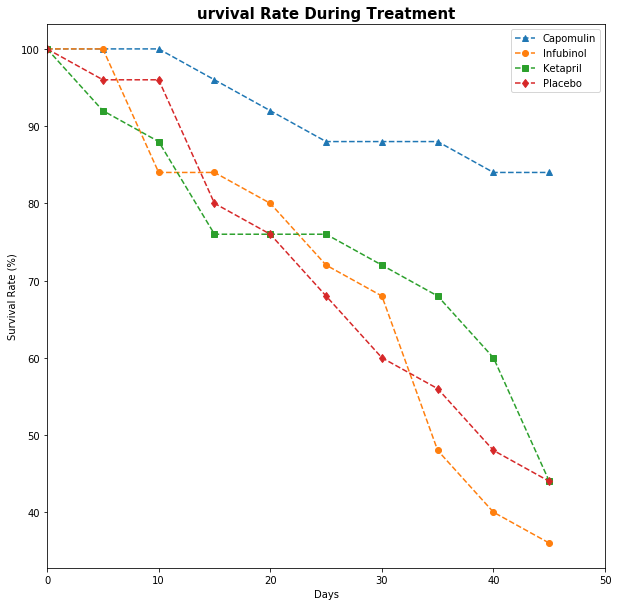

In [117]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (10,10))
plt.title('urvival Rate During Treatment', fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 10})
plt.ylabel('Survival Rate (%)', fontdict = {'fontsize': 10})
plt.xlim(0, mice_count_compare.index.max()+5 ) 

x = mice_count.index #timepoints
count = 0

#plot each tumor volume column with standard error
for drug in mice_count_compare:
    y = mice_count_compare[drug]/mice_count_compare.loc[0,drug] * 100 #calculates survival rate for each timepoint
    plt.plot(x, 
             y, 
             linestyle = '--',
             marker = markers[count])
    count += 1

#legend 
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc= 'best')
plt.show()

## Summary Bar Graph

In [122]:
# Calculate the percent changes for each drug
x= reformat_mean.iloc[-1]
y= reformat_mean.iloc[0]
tumor_change = ((x-y)/y) * 100
    
# Display the data to confirm
tumor_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

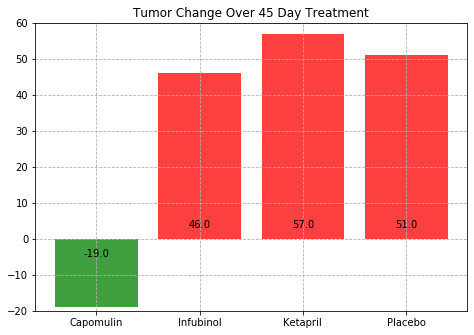

In [134]:
# Show the Figure
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

xaxis = [1,2,3,4]
x_values = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
y_values = [round(tumor_change.loc['Capomulin']), round(tumor_change.loc['Infubinol']), round(tumor_change.loc['Ketapril']), round(tumor_change.loc['Placebo'])]
colors = ['r' if i>0 else 'g' for i in y_values]
ax.bar(xaxis, y_values, color=colors, alpha=0.75, tick_label=x_values)

for a,b in zip(xaxis, y_values):
    c = 0
    if b > 0:
        c = 3
    else:
        c = -5
    plt.text(a, c, str(b), ha='center')

ax.set_ylim(-20, 60)
ax.grid(linestyle='--')
ax.set_title('Tumor Change Over 45 Day Treatment')

fig.savefig("Tumor-Chang.png")
plt.show()